### 530 HW6- Functions 
Emma Rasmussen 

#### Problem 1- Exoanding and Interpolating Functions 
##### Parts a & b

In [28]:
import numpy as np
import time

def TaylorSin(x, N):
    sinval = 0
    for i in range(N):
        term = ((-1)**(i+2))*(x**(2*i + 1)) / np.math.factorial(2*i + 1)
        sinval += term

    return sinval

def RMSE(act, pred):
    rmse = np.sqrt(np.mean((np.subtract(act,pred))**2))

    return rmse

def Interp(x,xvals,yvals):
    # np.random.seed(27)
    i = np.searchsorted(xvals,x)
    if i == 0:
        return yvals[0]
    elif i == len(xvals):
        return yvals[-1]
    x0,x1 = xvals[i-1],xvals[i]
    y0,y1 = yvals[i-1],yvals[i]
    interpval = y0 +(y1 - y0)*(x - x0)/(x1 - x0)

    return interpval

def AccSpeed(N):
    #The following line if we want the same random vector every time
    np.random.seed(27)
    xvals = np.random.uniform(0,2*np.pi,10**6)
    xn = np.linspace(0,2*np.pi, 10**6)
    yvals = np.sin(xn)
    apprxvec = []
    actualvec = []
    apprxveci = []
    actualveci = []

    # for part a
    st = time.time()
    for i in range(len(xvals)):
        apprx = TaylorSin(xvals[i], N)
        act = np.sin(xvals[i])
        apprxvec.append(apprx)
        actualvec.append(act)
    et = time.time()
    tt = et - st 

    # for part b
    sti = time.time()
    for i in range(len(xn)):
        apprx = Interp(xvals[i],xn, yvals)
        act = yvals[i]
        apprxveci.append(apprx)
        actualveci.append(act)
    eti = time.time()
    tti = eti - sti 
    rmse = RMSE(apprxvec, actualvec)
    rmsei = RMSE(apprxveci, actualveci)

    #return rmse, tt

    print(f'The rmse for N={N} was: {rmse}')
    print(f'The time it took for N={N} was: {tt}s')

    print(f'The rmse for interpolation for N={N} was: {rmsei}')
    print(f'The time it took for interpolation for N={N} was: {tti}s')

#Testing for different N
#AccSpeed(5)
#AccSpeed(7)
#AccSpeed(9)

#### Problem 2
##### Part a

In [58]:
from scipy.integrate import quad

#For part a, the blackbox python function
def f(x):
    return np.exp(-np.cos(x))

def g(x):
    if -1 <= x <= 1:
        return f(x)
    else: 
        return 0

i1 = 7.9549265210128452745132196653294
i23 = .87070265620795901020832433774759
val1,_ = quad(f, -np.pi, np.pi, limit=100)
val2,_ = quad(f, -1, 1, limit=100)
val3,_ = quad(g, -np.pi, np.pi, limit=100)
print(f'The difference between i1 and the actual value is:{i1-val1}')
print(f'The difference between i2 and the actual value is:{i23-val2}')
print(f'The difference between i3 and the actual value is:{i23-val3}')

The difference between i1 and the actual value is:-8.881784197001252e-16
The difference between i2 and the actual value is:1.1102230246251565e-16
The difference between i3 and the actual value is:-2.5360991084966145e-10


According to python documentation, this function is using a different series of functions for definite vs indefinite integrals. I will only descirbe the definite since that's what we used. It uses a Clenshaw-Curtis method. First, it computes the Chebyshev moments, then, it makes an integer array with the length of whatever you defined the limit as (I did 100). Then, it makes a subinterval for each moment. Then, it makes a rank 2 array with the moments, which it passes on to an integration by using the moments and subdivided array. 

#### Part b

0.0
0.0
0.5778636748954609
1.0634423267489395
0.8435053600599819
0.965315134143411
0.9066913881260548
0.8779531583344803
0.8637276610136758
0.8708776638031507
0.867311808717691


ValueError: x and y must have same first dimension, but have shapes (1,) and (11,)

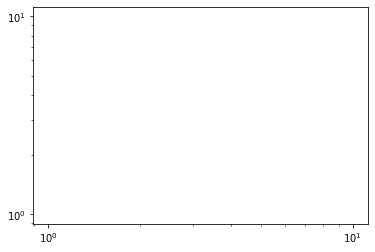

In [78]:
import matplotlib.pyplot as plt

def Trapf(lower, upper, N):
    a = lower
    b = upper 
    ksum = 0 
    k = np.arange(1, N-1, 1)
    for i in range(len(k)):
        x = a + k[i]*(b - a)/N
        y = f(x)
        ksum += y
    val = ((b - a)/N)*(((f(a) + f(b))/2) + ksum)
    h = 2*(b - a)/N

    return val,h

def Trapg(lower, upper, N):
    a = lower
    b = upper 
    ksum = 0 
    k = np.arange(1, N-1, 1)
    for i in range(len(k)):
        x = a + k[i]*(b - a)/N
        y = g(x)
        ksum += y
        
    val = ((b - a)/N)*(((g(a) + g(b))/2) + ksum)
    h = 2*(b - a)/N

    return val,h

def Plots(Nvec, Errvec, I):
    plt.figure()
    plt.loglog(Nvec,Errvec)
    plt.title(f'N vs Err for i{I}')
    plt.xlabel('N')
    plt.ylabel('Err')
    plt.show

N = [2**i for i in range(11)]

err1vec = []
err2vec = []
err3vec = []
h1vec = []
h2vec = []
h3vec = []


for i in range(len(N)):
    val1, h1 = Trapf(-np.pi, np.pi, N[i])
    val2, h2 = Trapf(-1, 1, N[i])
    val3, h3 = Trapg(-np.pi, np.pi, N[i])
    err1 = i1 - val1 
    err1vec.append(err1)
    h1vec.append(h1)
    err2 = i23 - val2 
    err2vec.append(err2)
    h2vec.append(h2)
    err3 = i23 - val3 
    err3vec.append(err3)
    h3vec.append(h3)

    
    print(val3)

Plots(h1, err1vec, 1)
Plots(h2, err2vec, 2)
Plots(h3, err3vec, 3)

    #print(f'For N ={N[i]}, the value is:{val}')



In [35]:
V= [9,2,3,4,5,4,2]
B = [8,3,5,7,8,3,3]

rmse = np.sqrt(np.mean((np.subtract(V,B))**2))
print(f'The rmse was: {rmse}')



The rmse was: 1.927248223318863
